# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [5]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [6]:
print(f'X_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'Image dimentions: {x_train[0].shape}')
import numpy as np
print(f'Number of classes in the train set: {len(np.unique(y_train))}')
print(f'Number of classes in the test set: {len(np.unique(y_test))}')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Image dimentions: (32, 32, 3)
Number of classes in the train set: 100
Number of classes in the test set: 100


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [7]:
# Your code here
# Normalization

x_train_norm = x_train / x_train.max()
x_test_norm = x_test / x_test.max()

print("x_train max pixel value:", x_train_norm.max())
print("x_test max pixel value:", x_test_norm.max())



x_train max pixel value: 1.0
x_test max pixel value: 1.0


In [8]:
# One-hot encoding
y_train = y_train.squeeze()
y_test = y_test.squeeze()

num_classes = len(np.unique(y_train))
y_train_one_hot = np.eye(num_classes)[y_train]
y_test_one_hot = np.eye(num_classes)[y_test]

print("Sample y_train_one_hot:", y_train_one_hot[0])
#print("Shape of y_train_one_hot:", y_train_one_hot.shape)

Sample y_train_one_hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [9]:
from sklearn.model_selection import train_test_split

x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train_norm, y_train_one_hot, test_size=0.2, random_state=42)

print("x_train_split shape:", x_train_split.shape)
print("x_val shape:", x_val.shape)
print("y_train_split shape:", y_train_split.shape)
print("y_val shape:", y_val.shape)

x_train_split shape: (40000, 32, 32, 3)
x_val shape: (10000, 32, 32, 3)
y_train_split shape: (40000, 100)
y_val shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [51]:
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense

def model5(input_shape, num_classes):
    model = Sequential()
    model.add(InputLayer(shape=input_shape))

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #strides=(2, 2)
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    return model

input_shape = (32, 32, 3)
num_classes = 100

model5 = model5(input_shape, num_classes)
model5.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,276 (977.64 KB)

 Trainable params: 250,276 (977.64 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [52]:
from keras import optimizers
from tensorflow.keras.optimizers import Adam

model5.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [53]:
# from keras import optimizers
# from tensorflow.keras.optimizers import Adam
# model5.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model5.fit(
    x_train_split, y_train_split,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32)

# I chose 10 epochs initially as a starting number close to regularily used 15.
# During the training in multiple models, I observed validation accuracy decreasing and val_loss increasing from epoch 4-7.

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 52ms/step - accuracy: 0.0635 - loss: 4.1751 - val_accuracy: 0.1868 - val_loss: 3.3659
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.2219 - loss: 3.1830 - val_accuracy: 0.2641 - val_loss: 2.9588
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.2982 - loss: 2.7811 - val_accuracy: 0.3069 - val_loss: 2.8024
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.3511 - loss: 2.4946 - val_accuracy: 0.3292 - val_loss: 2.6782
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.4037 - loss: 2.2851 - val_accuracy: 0.3415 - val_loss: 2.6033
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 51ms/step - accuracy: 0.4466 - loss: 2.0882 - val_accuracy: 0.3492 - val_loss: 2.5946
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 54ms/step - accuracy: 0.4836 - loss: 1.9214 - val_accuracy: 0.3379 - val_loss: 2.6808
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.5122 -

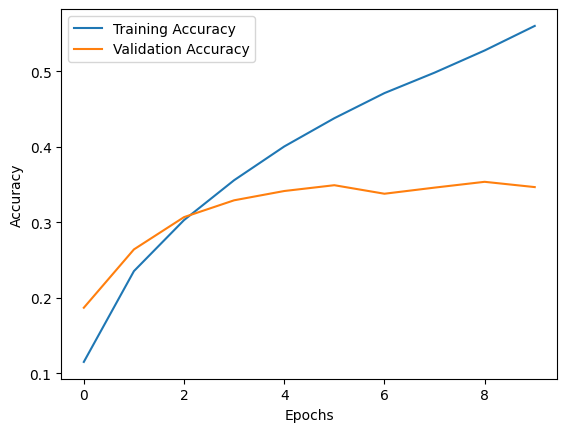

In [54]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [ ]:
# Considering the low accuracy observed topKcategorical Accuracy was chosen,
# checking if the true class is among the top 5 predicted classes, to provide more detail about accuracy.
# The metric is calculated by sorting the predictions by probability for each image,
# checking if the ground truth is among the 5 predicted top probabilities to consider true if is,
# and calculating the fraction of True images from the total number.
# Used 5 epochs as the model is overfitted with 10.

In [55]:
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.metrics import TopKCategoricalAccuracy

def model5(input_shape, num_classes):
    model = Sequential()
    model.add(InputLayer(shape=input_shape))

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #strides=(2, 2)
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    return model

input_shape = (32, 32, 3)
num_classes = 100

model5 = model5(input_shape, num_classes)
#model5.summary()

top_5_acc = TopKCategoricalAccuracy(k=5)
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', top_5_acc])

history = model5.fit(
    x_train_split, y_train_split,
    validation_data=(x_val, y_val),
    epochs=5,
    batch_size=32)


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 55ms/step - accuracy: 0.0654 - loss: 4.1464 - top_k_categorical_accuracy: 0.2127 - val_accuracy: 0.1827 - val_loss: 3.3671 - val_top_k_categorical_accuracy: 0.4589
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.2237 - loss: 3.1783 - top_k_categorical_accuracy: 0.5059 - val_accuracy: 0.2664 - val_loss: 2.9570 - val_top_k_categorical_accuracy: 0.5690
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.2960 - loss: 2.7792 - top_k_categorical_accuracy: 0.6104 - val_accuracy: 0.3060 - val_loss: 2.8184 - val_top_k_categorical_accuracy: 0.6035
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.3580 - loss: 2.4946 - top_k_categorical_accuracy: 0.6712 - val_accuracy: 0.3154 - val_loss: 2.7291 - val_top_k_categorical_accuracy: 0.6200
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.3938 - loss: 2.3221 - top_k_categorical_accuracy: 0.7065 - val_accuracy: 0.3347 - val_loss: 2.6

In [56]:
test_loss, test_accuracy, top_5_acc_test = model5.evaluate(x_test_norm, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")
print(f"Top-5 Test Accuracy: {top_5_acc_test * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3421 - loss: 2.6148 - top_k_categorical_accuracy: 0.6506
Test Accuracy: 33.61%
Test Loss: 2.61785626411438
Top-5 Test Accuracy: 64.53%


In [ ]:
# The top-5 accuracy is twice higher than the top-1 accuracy.
# The model frequently predicts the true class among the top 5 pridicted classes.
# This means that there is some learning happenning with this architecture, and the model can be potentially improved.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

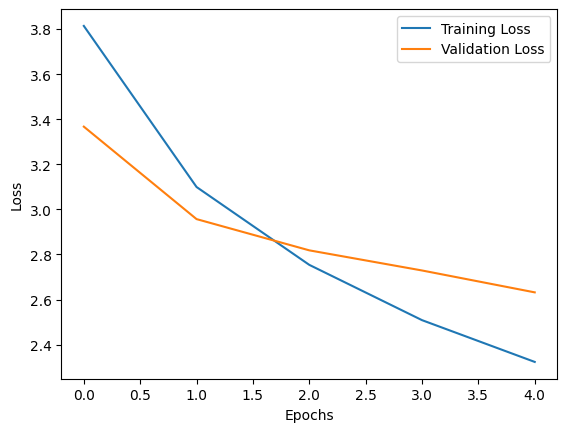

In [57]:
# Your code here
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

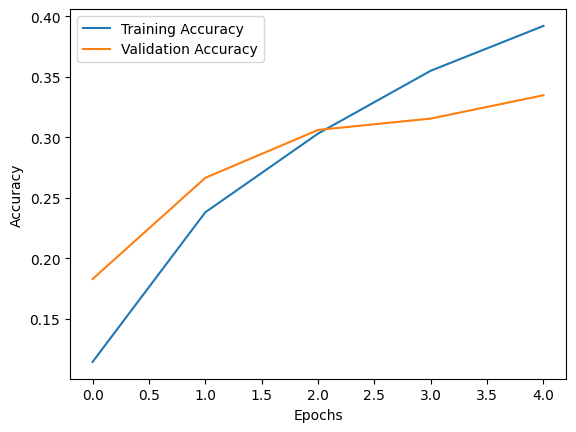

In [58]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
Correctly Classified Image:


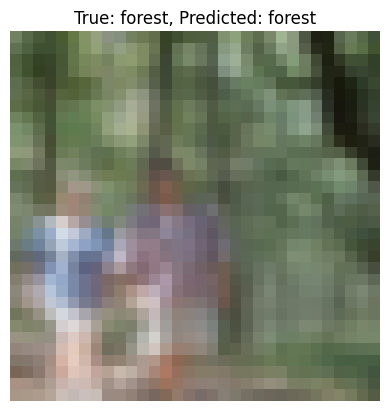

forest (33): 0.4184
squirrel (80): 0.0734
palm_tree (56): 0.0604
road (68): 0.0522
dinosaur (29): 0.0404
------------------------------
Incorrectly Classified Image:


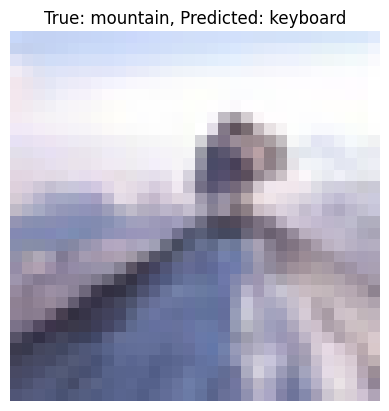

keyboard (39): 0.1462
whale (95): 0.1141
dolphin (30): 0.0724
worm (99): 0.0550
lamp (40): 0.0425
------------------------------


In [27]:
label_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
               'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
               'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
               'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
               'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
               'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
               'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
               'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
               'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
               'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
               'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
               'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
               'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip',
               'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

predictions = model5.predict(x_test_norm)  # Predict probabilities on normalized test data
predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class indices

true_classes = np.argmax(y_test_one_hot, axis=1)  # True class indices
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

correct_image_idx = correct_indices[0]  # First correctly classified image
incorrect_image_idx = incorrect_indices[0]  # First incorrectly classified image


def plot_image_with_probs(image_idx, x_test, true_classes, predictions, label_names):
    # Get the original image, true label, and predicted probabilities
    image = x_test[image_idx]
    true_label_idx = true_classes[image_idx]
    pred_probs = predictions[image_idx]
    pred_label_idx = np.argmax(pred_probs)

    # Map indices to label names
    true_label_name = label_names[true_label_idx]
    pred_label_name = label_names[pred_label_idx]

    # Plot the original image
    plt.imshow(image.astype('uint8'))  # Convert to uint8 to display properly
    plt.axis('off')
    plt.title(f"True: {true_label_name}, Predicted: {pred_label_name}")
    plt.show()

    # Display predicted probabilities with label names
    sorted_indices = np.argsort(pred_probs)[::-1]  # Sort probabilities in descending order
    for i in range(5):  # Top-5 predictions
        class_idx = sorted_indices[i]
        class_name = label_names[class_idx]
        print(f"{class_name} ({class_idx}): {pred_probs[class_idx]:.4f}")
    print("-" * 30)

# Plot and report for correct and incorrect classifications using the original dataset
print("Correctly Classified Image:")
plot_image_with_probs(correct_image_idx, x_test, true_classes, predictions, label_names)

print("Incorrectly Classified Image:")
plot_image_with_probs(incorrect_image_idx, x_test, true_classes, predictions, label_names)

In [ ]:

# The plots show signs of overfitting: while training accuracy is increasing, validation accuracy is reaching a plateau.
# For the correct prediction, the result do make sence,
# the right class has the top probability, and other classes, including some similar ones, are much less probable.
# For the incorrectly predicted, the right class wasn't in the top five predicted classes,
# and the precdicted class has relatively low probability.

# The classification probabilities indicate how shure was the model in the class prediction.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
# Because the model rapidly overfits, a dropout technique in can be used to address this.
# Dense layers contain more parameters and likely cause the overfitting, so droput can be applied in the dense layer first.
# Dropout(0.5) is used to begin the experiment. 5 epochs are used to evaluate the performance.

In [38]:
# Your code here
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.metrics import TopKCategoricalAccuracy

def model51(input_shape, num_classes):
    model = Sequential()
    model.add(InputLayer(shape=input_shape))

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #strides=(2, 2)
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

input_shape = (32, 32, 3)
num_classes = 100

model51 = model51(input_shape, num_classes)
#model5.summary()

top_5_acc = TopKCategoricalAccuracy(k=5)
model51.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', top_5_acc])

history = model51.fit(
    x_train_split, y_train_split,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 54ms/step - accuracy: 0.0346 - loss: 4.3597 - top_k_categorical_accuracy: 0.1394 - val_accuracy: 0.1401 - val_loss: 3.6567 - val_top_k_categorical_accuracy: 0.3783
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.1329 - loss: 3.6563 - top_k_categorical_accuracy: 0.3708 - val_accuracy: 0.2090 - val_loss: 3.2674 - val_top_k_categorical_accuracy: 0.4909
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.1894 - loss: 3.3446 - top_k_categorical_accuracy: 0.4654 - val_accuracy: 0.2467 - val_loss: 3.0436 - val_top_k_categorical_accuracy: 0.5545
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 54ms/step - accuracy: 0.2228 - loss: 3.1286 - top_k_categorical_accuracy: 0.5174 - val_accuracy: 0.2675 - val_loss: 2.9694 - val_top_k_categorical_accuracy: 0.5781
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.2541 - loss: 2.9805 - top_k_categorical_accuracy: 0.5580 - val_accuracy: 0.2916 - val_loss

In [39]:
# Dropout parameter after the dense layer tuned to 0.3, because 0.5 did not make much differnece.
def model52(input_shape, num_classes):
    model = Sequential()
    model.add(InputLayer(shape=input_shape))

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #strides=(2, 2)
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    return model

input_shape = (32, 32, 3)
num_classes = 100

model52 = model52(input_shape, num_classes)
#model5.summary()

top_5_acc = TopKCategoricalAccuracy(k=5)
model52.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', top_5_acc])

history = model52.fit(
    x_train_split, y_train_split,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 53ms/step - accuracy: 0.0445 - loss: 4.2873 - top_k_categorical_accuracy: 0.1619 - val_accuracy: 0.1634 - val_loss: 3.5165 - val_top_k_categorical_accuracy: 0.4228
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.1681 - loss: 3.4629 - top_k_categorical_accuracy: 0.4274 - val_accuracy: 0.2338 - val_loss: 3.1080 - val_top_k_categorical_accuracy: 0.5368
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.2342 - loss: 3.0936 - top_k_categorical_accuracy: 0.5276 - val_accuracy: 0.2706 - val_loss: 2.9330 - val_top_k_categorical_accuracy: 0.5720
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.2785 - loss: 2.8808 - top_k_categorical_accuracy: 0.5809 - val_accuracy: 0.2948 - val_loss: 2.8003 - val_top_k_categorical_accuracy: 0.6075
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.3125 - loss: 2.6999 - top_k_categorical_accuracy: 0.6270 - val_accuracy: 0.3192 - val_loss

In [40]:
# Dropout parameter after the dense layer tuned to 0.7.
def model53(input_shape, num_classes):
    model = Sequential()
    model.add(InputLayer(shape=input_shape))

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #strides=(2, 2)
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.7))
    model.add(Dense(num_classes, activation='softmax'))

    return model

input_shape = (32, 32, 3)
num_classes = 100

model53 = model53(input_shape, num_classes)
#model5.summary()

top_5_acc = TopKCategoricalAccuracy(k=5)
model53.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', top_5_acc])

history = model53.fit(
    x_train_split, y_train_split,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 54ms/step - accuracy: 0.0288 - loss: 4.4335 - top_k_categorical_accuracy: 0.1160 - val_accuracy: 0.1146 - val_loss: 3.7932 - val_top_k_categorical_accuracy: 0.3412
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 57ms/step - accuracy: 0.0951 - loss: 3.8700 - top_k_categorical_accuracy: 0.2999 - val_accuracy: 0.1743 - val_loss: 3.4600 - val_top_k_categorical_accuracy: 0.4529
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 55ms/step - accuracy: 0.1396 - loss: 3.5938 - top_k_categorical_accuracy: 0.3856 - val_accuracy: 0.2154 - val_loss: 3.2688 - val_top_k_categorical_accuracy: 0.5113
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 57ms/step - accuracy: 0.1654 - loss: 3.4285 - top_k_categorical_accuracy: 0.4379 - val_accuracy: 0.2293 - val_loss: 3.1230 - val_top_k_categorical_accuracy: 0.5381
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 54ms/step - accuracy: 0.1939 - loss: 3.2976 - top_k_categorical_accuracy: 0.4731 - val_accuracy: 0.2541 - val_loss

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [41]:
# The model52 with 0.3 dropout after the 256 dense layer was the best so far,
# so I further experimented with removal of strides in the second convolutional layer.
def model521(input_shape, num_classes):
    model = Sequential()
    model.add(InputLayer(shape=input_shape))

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #strides=(2, 2)
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    return model

input_shape = (32, 32, 3)
num_classes = 100

model521 = model521(input_shape, num_classes)
#model5.summary()

top_5_acc = TopKCategoricalAccuracy(k=5)
model521.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', top_5_acc])

history = model521.fit(
    x_train_split, y_train_split,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32)

# # Your code here
# test_loss, test_accuracy, top_5_acc_test = model51.evaluate(x_test_norm, y_test_one_hot)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
# print(f"Test Loss: {test_loss}")
# print(f"Top-5 Test Accuracy: {top_5_acc_test * 100:.2f}%")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 198s 157ms/step - accuracy: 0.0526 - loss: 4.2578 - top_k_categorical_accuracy: 0.1792 - val_accuracy: 0.1966 - val_loss: 3.3239 - val_top_k_categorical_accuracy: 0.4737
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 195s 156ms/step - accuracy: 0.1958 - loss: 3.3154 - top_k_categorical_accuracy: 0.4708 - val_accuracy: 0.2779 - val_loss: 2.9036 - val_top_k_categorical_accuracy: 0.5869
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 200s 154ms/step - accuracy: 0.2755 - loss: 2.9042 - top_k_categorical_accuracy: 0.5770 - val_accuracy: 0.3218 - val_loss: 2.6661 - val_top_k_categorical_accuracy: 0.6344
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 199s 152ms/step - accuracy: 0.3252 - loss: 2.6329 - top_k_categorical_accuracy: 0.6434 - val_accuracy: 0.3540 - val_loss: 2.5523 - val_top_k_categorical_accuracy: 0.6632
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 186s 149ms/step - accuracy: 0.3609 - loss: 2.4804 - top_k_categorical_accuracy: 0.6720 - val_accuracy: 0.3667 

In [42]:
test_loss, test_accuracy, top_5_acc_test = model521.evaluate(x_test_norm, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")
print(f"Top-5 Test Accuracy: {top_5_acc_test * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.4044 - loss: 2.4176 - top_k_categorical_accuracy: 0.6998
Test Accuracy: 39.74%
Test Loss: 2.406724691390991
Top-5 Test Accuracy: 70.22%


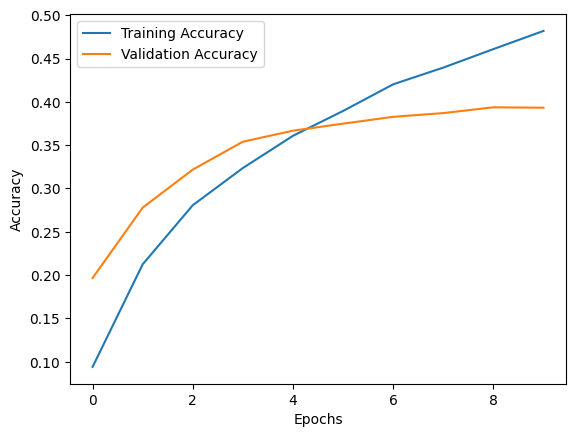

In [45]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step
Correctly Classified Image:


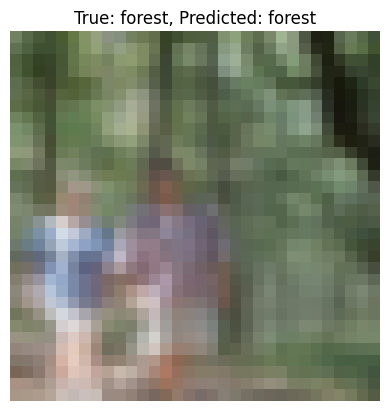

forest (33): 0.6115
squirrel (80): 0.0680
leopard (42): 0.0421
porcupine (63): 0.0330
rabbit (65): 0.0292
------------------------------
Incorrectly Classified Image:


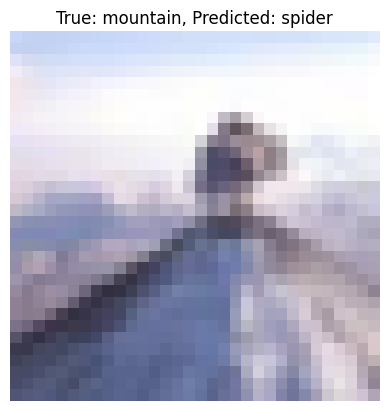

spider (79): 0.2802
dolphin (30): 0.1173
whale (95): 0.0660
baby (2): 0.0481
pine_tree (59): 0.0443
------------------------------


In [46]:
predictions = model521.predict(x_test_norm)  # Predict probabilities on normalized test data
predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class indices

true_classes = np.argmax(y_test_one_hot, axis=1)  # True class indices
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

correct_image_idx = correct_indices[0]  # First correctly classified image
incorrect_image_idx = incorrect_indices[0]  # First incorrectly classified image


def plot_image_with_probs(image_idx, x_test, true_classes, predictions, label_names):
    # Get the original image, true label, and predicted probabilities
    image = x_test[image_idx]
    true_label_idx = true_classes[image_idx]
    pred_probs = predictions[image_idx]
    pred_label_idx = np.argmax(pred_probs)

    # Map indices to label names
    true_label_name = label_names[true_label_idx]
    pred_label_name = label_names[pred_label_idx]

    # Plot the original image
    plt.imshow(image.astype('uint8'))  # Convert to uint8 to display properly
    plt.axis('off')
    plt.title(f"True: {true_label_name}, Predicted: {pred_label_name}")
    plt.show()

    # Display predicted probabilities with label names
    sorted_indices = np.argsort(pred_probs)[::-1]  # Sort probabilities in descending order
    for i in range(5):  # Top-5 predictions
        class_idx = sorted_indices[i]
        class_name = label_names[class_idx]
        print(f"{class_name} ({class_idx}): {pred_probs[class_idx]:.4f}")
    print("-" * 30)

# Plot and report for correct and incorrect classifications using the original dataset
print("Correctly Classified Image:")
plot_image_with_probs(correct_image_idx, x_test, true_classes, predictions, label_names)

print("Incorrectly Classified Image:")
plot_image_with_probs(incorrect_image_idx, x_test, true_classes, predictions, label_names)

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

In [ ]:
# The 0.3 dropout after the 256 dense layer slightly improved the accuracy, delayed overfitting, and increased probability of the predicted class in the example prediction.
# More detaild feature extraction (removal of strides in the 2nd conv layer) resulted in higher accuracy

# The model improved with the dropout after the 256 dense layer because the layer was indeed contributing to overfitting.
# At the same time, the resolution of features may still be insufficient.

# The latest model is less overfitted, so there could be a room for some improvement.
# Other layers (conv) might also be contributing to overfitting.
# The resolution of features can probably be improved with additional layers.

# Other techniques to improve the model could be adding another dense layer, batch normalization after the dense layer and before the dropout,
# adding additional drpouts (0.1-0.2) after convolutional layers, choosing a different optimizer, L2 regularization to penalize large weights.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.